In [1]:
# Dependencies
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [59]:
# Wine Spectator tasters review wines on the following 100-point scale:

# 95-100 Classic: a great wine
# 90-94 Outstanding: a wine of superior character and style
# 85-89 Very good: a wine with special qualities
# 80-84 Good: a solid, well-made wine
# 75-79 Mediocre: a drinkable wine that may have minor flaws
# 50-74 Not recommended

# https://www.winespectator.com/articles/scoring-scale#:~:text=Finished%20wines%2C%20reviewed%20from%20bottle,tasting%20of%20an%20unfinished%20wine.&text=For%20example%2C%20one%20wine%20may,90%2C%20another%2089%2D92.

In [23]:
# Read data
weather = pd.read_csv('Resources/dataLargerSet-Copy1.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [27]:
weatherClean=weather.drop(["Unnamed: 0", "index"], axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [28]:
weatherClean.sort_values('points')

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
97,Muscardini,2009,80,Kenwood,41.129032,62.774194,54.419355,4.9,28.838710,70.645161,...,78.967742,0.0,4.354839,47.677419,54.161290,88.161290,77.612903,0.0,6.354839,50.032258
261,Fenestra,2009,81,Livermore,42.096774,63.290323,55.290323,3.9,25.419355,74.322581,...,78.935484,0.0,4.000000,48.935484,56.000000,89.516129,78.548387,0.0,6.967742,51.451613
461,Peterson,2009,81,Healdsburg,41.548387,60.677419,53.193548,5.7,26.129032,70.935484,...,75.903226,0.0,2.580645,52.064516,55.451613,82.838710,73.935484,0.1,4.967742,54.612903
481,Kenwood,2011,81,Kenwood,36.645161,57.483871,50.096774,12.6,58.967742,86.354839,...,74.290323,0.0,5.806452,62.419355,50.387097,83.677419,73.161290,0.0,1.354839,59.774194
873,Adelaida,2009,81,Paso Robles,41.870968,67.451613,57.741935,1.1,16.064516,61.612903,...,85.806452,0.0,2.387097,32.516129,57.935484,92.161290,81.935484,0.1,4.516129,36.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Gandona,2009,97,Saint Helena,41.129032,62.774194,54.419355,4.9,28.838710,70.645161,...,78.967742,0.0,4.354839,47.677419,54.161290,88.161290,77.612903,0.0,6.354839,50.032258
610,Williams Selyem,2010,98,Healdsburg,39.774194,60.322581,52.225806,4.5,29.129032,73.258065,...,74.064516,0.0,1.290323,56.387097,49.483871,84.870968,73.258065,0.0,3.096774,61.290323
626,Williams Selyem,2013,98,Healdsburg,40.225806,65.064516,55.838710,2.5,28.935484,70.032258,...,76.000000,0.0,2.967742,60.000000,53.161290,82.741935,72.645161,0.1,5.290323,63.870968
684,Alpha Omega,2012,99,Rutherford,35.870968,57.967742,50.032258,12.2,50.096774,78.129032,...,74.064516,0.0,5.774194,61.935484,52.645161,87.645161,75.516129,0.0,3.612903,55.967742


In [29]:
pd.unique(weatherClean["points"])

array([88, 87, 94, 93, 91, 95, 86, 90, 83, 89, 92, 85, 84, 82, 80, 96, 81,
       97, 99, 98], dtype=int64)

In [30]:
weatherClean.drop_duplicates().points.value_counts()

90    177
88    161
87    140
92    124
91    119
86    104
93     90
89     86
85     73
84     47
94     42
95     24
83     21
82     15
96      6
81      5
97      3
99      2
98      2
80      1
Name: points, dtype: int64

In [31]:
# Points into bins 'PointsRange'

bins = [0, 80, 85, 90, 95, 100]
names = ['<80','80-84', '85-89', '90-94', '95-100', '100+']

d = dict(enumerate(names, 1))

weatherClean['pointsRange'] = np.vectorize(d.get)(np.digitize(weatherClean['points'], bins))

weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity,pointsRange
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000,85-89
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000,85-89
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452,90-94
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194,90-94
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194,90-94


In [32]:
weatherClean.drop_duplicates().pointsRange.value_counts()

85-89     564
90-94     552
80-84      89
95-100     37
Name: pointsRange, dtype: int64

In [6]:
# Data Pre-Processing

In [33]:
weatherClean.columns

Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity', 'pointsRange'],
      dtype='object')

In [34]:
X= weatherClean.drop(['winery', 'vintage', 'points', 'cities','pointsRange'], axis=1)
y= weatherClean['points']
print(X.shape, y.shape)

(1328, 36) (1328,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [36]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
#Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [38]:
#One-Hot Encode- Catergorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(y_train_categorical.shape, y_test_categorical.shape)

(996, 100) (332, 96)


In [19]:
# Create model and add layers****************************
# model = Sequential()
# model.add(Dense(units=5, activation='softmax', input_dim=X.shape[1]))
# model.add(Dense(units=5, activation='softmax', input_dim=X.shape[1]))
# model.add(Dense(units=1))

In [39]:
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=X.shape[1]))
##model.add(Dense(units=200, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [12]:
# Create Deep Learning Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# Compile and fit the model
# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=['sparse_top_k_categorical_accuracy'])
# Epoch 200/200
# 32/32 - 0s - loss: 0.0233 - sparse_top_k_categorical_accuracy: 0.9980

In [16]:
# # Compile and fit the model
# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=['top_k_categorical_accuracy'])
# Epoch 200/200
# 32/32 - 0s - loss: 0.0225 - top_k_categorical_accuracy: 1.0000

In [41]:
# Compile and fit the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [42]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               7400      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 33,060
Trainable params: 33,060
Non-trainable params: 0
_________________________________________________________________


In [44]:
print(X_train_scaled.shape)
print(y_train.shape)

(996, 36)
(996,)


In [46]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60


ValueError: in user code:

    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [21]:
# history.history

In [22]:
# # Quantify our Trained Model
# model_loss, model_accuracy = model.evaluate(
#     X_test_scaled, y_test_categorical, verbose=2)
# print(
#     f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [47]:
# Make Predictions
encoded_predictions = model.predict_classes(X_test_scaled)
y_predictions = y_scaler.inverse_transform(encoded_predictions)

C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


NameError: name 'y_scaler' is not defined

In [24]:
print(f"Predicted classes: {y_predictions[:5]}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [[99.]
 [99.]
 [80.]
 [99.]
 [80.]]
Actual Labels: [90, 93, 86, 88, 85]


In [25]:
from numpy import mean, absolute 

# mean(absolute(weatherClean["y_test"] - weatherClean["y_predictions"]))


from sklearn.metrics import accuracy_score
accuracy_score(y_test[:5], y_predictions[:5], normalize=False)

0

In [26]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predictions), 2))
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec21/computing-regression-accuracy

Mean absolute error = 8.68
Mean squared error = 83.13
Median absolute error = 8.0
Explain variance score = -5.35
R2 score = -9.05


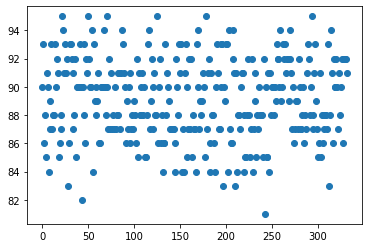

In [27]:
import matplotlib.pyplot as plt
xx=[z for z in range(0,len(y_test))]
plt.scatter(xx,y_test)
plt.show()

In [28]:
# print(y_test)

In [29]:
dfAccur=pd.DataFrame( )
dfAccur["y_test"]= y_test
dfAccur["y_predictions"]= y_predictions
dfAccur.head(100)

,y_test,y_predictions
0,90,99.0
1,93,99.0
2,86,80.0
3,88,99.0
4,85,80.0
...,...,...
95,86,80.0
96,91,99.0
97,87,80.0
98,88,80.0
